In [89]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], ignore_index = True) 
data

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [90]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [91]:
data.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,NaN,0.027036,NaN,1987.000000
50%,142.247000,NaN,0.054021,NaN,1999.000000
75%,185.855600,NaN,0.094037,NaN,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [92]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [93]:
for x in data.dtypes.index:
    print(("data type of {0} is {1}").format(x, data.dtypes[x]))

data type of Item_Fat_Content is object
data type of Item_Identifier is object
data type of Item_MRP is float64
data type of Item_Outlet_Sales is float64
data type of Item_Type is object
data type of Item_Visibility is float64
data type of Item_Weight is float64
data type of Outlet_Establishment_Year is int64
data type of Outlet_Identifier is object
data type of Outlet_Location_Type is object
data type of Outlet_Size is object
data type of Outlet_Type is object
data type of source is object


In [94]:
categorical_columns = [x for x in data.dtypes.index if (data.dtypes[x] == 'object' and (x != 'source' and x != 'Item_Identifier' and x != 'Outlet_Identifier'))]
#print(categorical_columns)

for category in categorical_columns:
    print('\n{0} (Frequency)'.format(category))
    print(data[category].value_counts())


Item_Fat_Content (Frequency)
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type (Frequency)
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Location_Type (Frequency)
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Size (Frequency)
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Type (Frequency)
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    

In [95]:
data.pivot_table(index = 'Outlet_Type', values = 'Item_Outlet_Sales')

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [96]:
visibility_avg = data.pivot_table(index = 'Item_Identifier', values = 'Item_Visibility')
miss_bool = data['Item_Visibility'] == 0
#print(type(miss_bool))
data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg[x])

In [97]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [98]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [99]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drink'})

In [100]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Combined, dtype: int64

In [101]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

In [102]:
print('Originally')
print(data['Item_Fat_Content'].value_counts())

Originally
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [103]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
print('Finally')
print(data['Item_Fat_Content'].value_counts())

Finally
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [104]:
data['Outlet_Identifier'].head()

0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object

In [1]:
from sklearn.preprocessing import LabelEncoder
data['Outlet'] = LabelEncoder().fit_transform(data['Outlet_Identifier'])
#print(('{0} {1}').format(data['Outlet_Identifier'], data['Outlet']))
#data['Outlet_Identifier'].value_counts()

NameError: name 'data' is not defined

In [106]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
data = pd.get_dummies(data, columns=[x for x in var_mod])
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Visibility_MeanRatio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,0.931078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,0.933420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,0.960069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,train,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,train,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
data.isnull().any()

Item_Identifier                      False
Item_MRP                             False
Item_Outlet_Sales                     True
Item_Type                            False
Item_Visibility                      False
Item_Weight                           True
Outlet_Establishment_Year            False
Outlet_Identifier                    False
source                               False
Item_Visibility_MeanRatio            False
Outlet_Years                         False
Item_Fat_Content_Low Fat             False
Item_Fat_Content_Regular             False
Outlet_Location_Type_Tier 1          False
Outlet_Location_Type_Tier 2          False
Outlet_Location_Type_Tier 3          False
Outlet_Size_High                     False
Outlet_Size_Medium                   False
Outlet_Size_Small                    False
Item_Type_Combined_Drink             False
Item_Type_Combined_Food              False
Item_Type_Combined_Non-Consumable    False
Outlet_Type_Grocery Store            False
Outlet_Type

In [108]:
data['Item_Weight'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18        True
19       False
20       False
21        True
22       False
23        True
24       False
25       False
26       False
27       False
28       False
29        True
         ...  
14174    False
14175    False
14176    False
14177    False
14178     True
14179     True
14180    False
14181    False
14182    False
14183    False
14184     True
14185    False
14186    False
14187    False
14188     True
14189    False
14190    False
14191    False
14192     True
14193    False
14194    False
14195    False
14196    False
14197    False
14198    False
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Weight, dtype: bool

In [109]:
weight_avg = data.pivot_table(index = 'Item_Identifier', values = 'Item_Weight')
missing_weights = data['Item_Weight'].isnull()
data.loc[missing_weights, 'Item_Weight'] = data.loc[missing_weights, 'Item_Identifier'].apply(lambda x: weight_avg[x])

In [110]:
columns_to_be_dropped = ['Item_Type','Outlet_Establishment_Year']
data.drop([x for x in columns_to_be_dropped], axis = 1, inplace = True)

In [111]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

#Important Step
test.drop(['Item_Outlet_Sales','source'],axis = 1,inplace = True)
train.drop(['source'],axis = 1,inplace = True)
train.to_csv("train_modified.csv",index = False)
test.to_csv("test_modified.csv", index = False)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [112]:
#Algo - 0
mean_sale = train['Item_Outlet_Sales'].mean()
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sale

base1.to_csv("alg0.csv",index = False)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [117]:
pd.options.mode.chained_assignment = None # To remove the red warnings

Model Report
RMSE : 1127


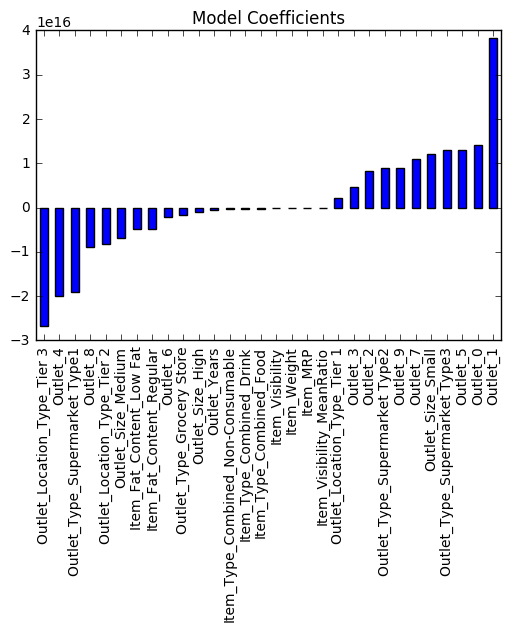

In [123]:
#Creating Generic Function for Models
target = 'Item_Outlet_Sales'
output_columns = ['Item_Identifier', 'Outlet_Identifier']
from sklearn import cross_validation, metrics
import matplotlib.pyplot as plt


def make_model(algorithm, d_train, d_test, predictors, target, output_columns, filename):
    algorithm.fit(d_train[predictors], d_train[target])
    d_train_prediction = algorithm.predict(d_train[predictors])
    
    #Perform Cross Validation
    #cv_score = cross_validation().cross_val_score(algorithm, d_train[predictors], d_train[target], cv = 20, scoring = 'mean_squared_error')
    #cv_score = np.sqrt(np.abs(cv_score))
    
    #Print Model Report
    print('Model Report')
    print('RMSE : %.4g' % np.sqrt(metrics.mean_squared_error(d_train[target].values, d_train_prediction)))
    #print('CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    d_test[target] = algorithm.predict(d_test[predictors])
    
    #Export submission file:
    output_columns.append(target)
    submission = pd.DataFrame({ x: d_test[x] for x in output_columns})
    submission.to_csv(filename, index = False)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target] + output_columns]

# print predictors

algo_1 = LinearRegression(normalize = True)
make_model(algo_1, train, test, predictors, target, output_columns, 'algo_1.csv')
coef1 = pd.Series(algo_1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title = 'Model Coefficients')



Model Report
RMSE : 1129


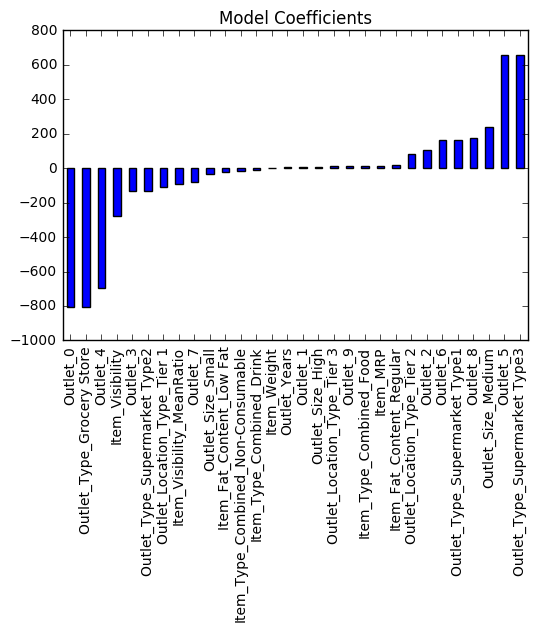

In [124]:
#Ridge Regression (Since coefficients are very large)
algo_2 = Ridge(alpha = 0.05, normalize = True)
make_model(algo_2, train, test, predictors, target, output_columns, 'algo_2.csv')
coef2 = pd.Series(algo_2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

Model Report
RMSE : 1057


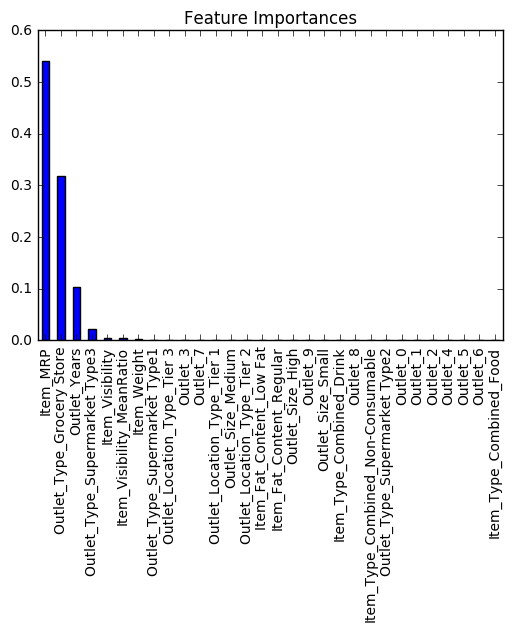

In [127]:
from sklearn.tree import DecisionTreeRegressor
algo_3 = DecisionTreeRegressor(max_depth = 15, min_samples_leaf=100)
make_model(algo_3, train, test, predictors, target, output_columns, 'algo_3.csv' )
coef3 = pd.Series(algo_3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

Model Report
RMSE : 1074


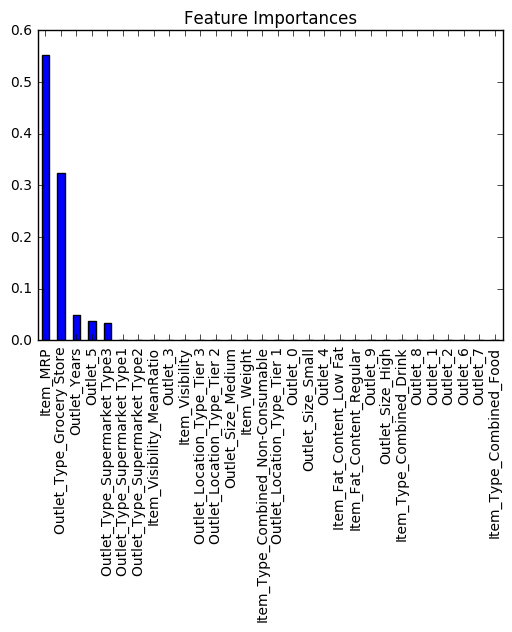

In [128]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
algo_4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
make_model(algo_4, train, test, predictors, target, output_columns, 'algo_4.csv')
coef4 = pd.Series(algo_4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

Model Report
RMSE : 1068


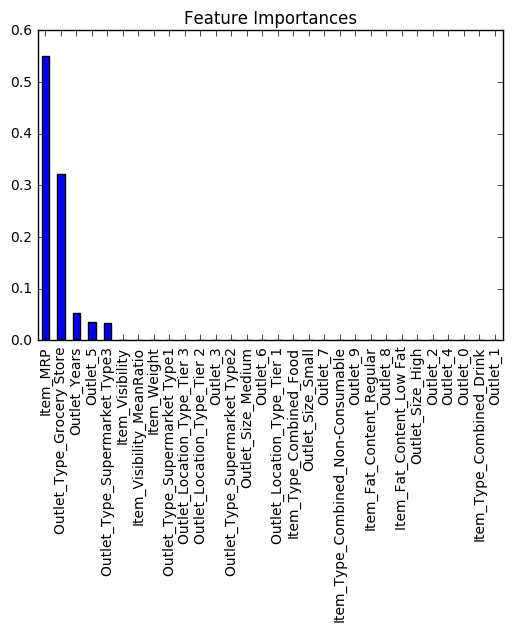

In [129]:
#Random Forest Modification
algo_4 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
make_model(algo_4, train, test, predictors, target, output_columns, 'algo_4.csv')
coef4 = pd.Series(algo_4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')